# Tarea 5
## Matemáticas para la Ciencia de Datos
## Docente: **Briceyda B. Delgado**
## Alumno: **Luis Fernando Izquierdo Berdugo**
## Fecha: **7 de Octubre de 2024**


**Inciso 1**

Cuando se utilizan programas para construir simulaciones, a menudo se necesita una estimación del tiempo de CPU necesario para ejecutar la simulación, ya que algunos parámetros han cambiado. A veces, esto puede ser un problema muy difícil de resolver, porque no está claro co ́mo el esfuerzo de la CPU depende de los parámetros. En este ejercicio, consideraremos un programa muy simple para ilustrar cómo se pueden generar estimaciones de tiempo.
Supongamos que queremos una solución numérica del problema

$y'(t) = e^{y(t)}$, $y(0) = 0$, $0 \le t \le 1.$

Si intentamos resolver (1) usando el esquema estándar de Euler, tenemos que

$y_{k+1} = y_k + \Delta te^{yk}, k = 0,1,···n−1.$

con $y_0 = 0$. Aquó, $\Delta t = 1/n$, donde $n > 0$ es un número entero. En la Tabla siguiente hemos enumerado el tiempo de CPU que necesita un sencillo programa en C para calcular $y_n$ en el tiempo $t = 1$ en un procesador Pentium III de 600 MHz.

| n       | CPU time | $y_n$  |
|---------|----------|--------|
| 100 000 | 0.05     | 9.9181 |
| 200 000 | 0.09     | 10.549 |
| 300 00  | 0.13     | 10.919 |
| 400 00  | 0.18     | 11.183 |

A partir del esquema, es razonable suponer que el tiempo de CPU c.n/, puede modelarse adecuadamente utilizando una función lineal, es decir,

$c(n) = \alpha + \beta n$

- Utilice los datos de la tabla para determinar $\alpha$ y $\beta$ por el método de mínimos cuadrados.
- Estime el tiempo de CPU necesario en los casos de $n = 10^6$ y $n = 10^7$

**Inciso 2**

Realice un análisis de las temperaturas promedio de uno de los 32 estados de México aproximando a través del método de mínimos cuadraados para el caso lineal y cuadrático. Los estados se asignarán de forma personalizada. Los datos provienen del Servicio Metereológico Nacional

https://datos.gob.mx/busca/dataset/temperatura-promedio-excel

Además, incluya las gráficas correspondientes.

## Inciso 1

Para obtener la función lineal $c(n) = \alpha + \beta n$, por medio del método de mínimos cuadrados, es necesario tener en cuenta la manera de calcular ambos.

#### $\beta = \frac{\sum {xy} - \frac{(\sum x) (\sum y)}{n}}{\sum {x^2} - \frac{(\sum {x})^2}{n}}$

#### $\alpha = \frac{\sum y}{n} - \beta \frac{\sum x}{n}$

Para facilitar los cálculos, se hizo una tabla con las sumatorias de dichos casos
| n        | CPU Time | yn      | XY       | X^2         |
|----------|----------|---------|----------|-------------|
| 100000   | 0.05     | 9.9181  | 0.495905 | 98.36870761 |
| 200000   | 0.09     | 10.549  | 0.94941  | 111.281401  |
| 300000   | 0.13     | 10.919  | 1.41947  | 119.224561  |
| 400000   | 0.18     | 11.183  | 2.01294  | 125.059489  |
| $\sum{}$ | 0.45     | 42.5691 | 4.877725 | 453.9341586 |

Con esto, se puede calcular $\alpha$ y $\beta$.

#### $\beta = \frac{134000 - \frac{(1000000)(0.45)}{4}}{300000000000 - \frac{(1000000)^2}{4}} = \frac{21500}{50000000000} = 0.00000043$

$\alpha = \frac{0.45}{4} - 0.00000043\frac{1000000}{4} = 0.005$

La función lineal quedaría de la siguiente manera:

$c(n) = 0.005 + 0.00000043n$

Evaluando para los valores de $n$ dados originalmente:
| n       | CPU Time | Evaluación |
|---------|----------|------------|
| 100000  | 0.05     | 0.048      |
| 200000  | 0.09     | 0.091      |
| 300000  | 0.13     | 0.134      |
| 400000  | 0.18     | 0.177      |

Se observa que son bastante similares los evaluados a los originales, por lo cual se concluye que la ecuación es correcta

Para obtener el tiempo de CPU para cuando n es igual a $10^6$ y $10^7$, simplemente sustituimos el valor de n en la ecuación obtenida:

$c(n) = 0.005 + 0.00000043(10^6)$


$c(n) = 0.005 + 0.00000043(10^7)$

Siendo los resultados:
| n        | CPU Time |
|----------|----------|
| 1000000  | 0.435    |
| 10000000 | 4.305    |

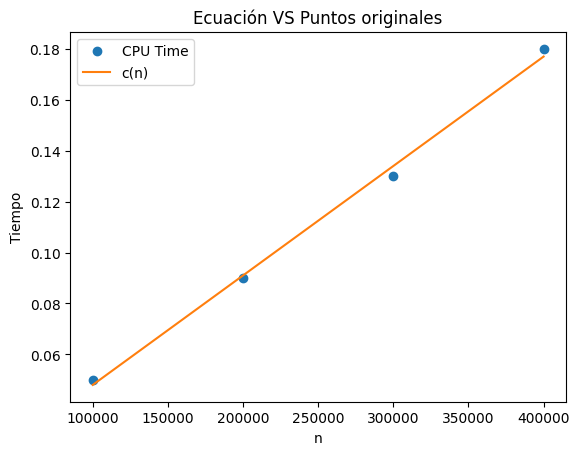

In [23]:
import matplotlib.pyplot as plt
import numpy as np

n = [100000, 200000, 300000, 400000]
cpu_time = [0.05, 0.09, 0.13, 0.18]

def c(n):
    return 0.005 + 0.00000043 * n

n_ecuacion = np.linspace(min(n), max(n), 100)

plt.plot(n, cpu_time, 'o', label='CPU Time')  # Solo puntos, sin línea
plt.plot(n_ecuacion, c(n_ecuacion), label='c(n)')
plt.xlabel('n')
plt.ylabel('Tiempo')
plt.title('Ecuación VS Puntos originales')

plt.legend()
plt.show()

## Inciso 2

Lo primero será importar todos los archivos de temperaturas promedio y hacer un dataframe unicamente con el estado que se analizará

In [24]:
import pandas as pd
import glob

# Directorio donde se encuentran los archivos Excel
directorio = "/Users/izluis/Documents/Maestria/Matemáticas para la ciencia de datos/Tareas/Tarea 5/Temperatura_Promedio_Excel"  # Reemplaza con la ruta real a tu carpeta

# Lista para almacenar los promedios anuales de Yucatán
datos_anuales = []

# Iterar sobre todos los archivos Excel en el directorio
for archivo in glob.glob(directorio + "/*.xlsx"):
    # Extraer el año del nombre del archivo
    año = int(archivo.split("/")[-1].split(".")[0][:4])

    # Leer el archivo Excel, omitiendo la primera fila
    df = pd.read_excel(archivo, header=1)

    # Filtrar los datos para Yucatán y seleccionar solo la columna 'ANUAL'
    datos_yucatan = df[df['ENTIDAD'].str.upper() == 'COLIMA']['ANUAL']

    # Crear un diccionario con el año y el dato anual
    data = {'Año': año, 'Temperatura Anual': datos_yucatan.values[0]}

    # Agregar el diccionario a la lista
    datos_anuales.append(data)

# Crear un DataFrame con los datos anuales de Yucatán
df_final = pd.DataFrame(datos_anuales)
df_final = df_final.sort_values(by='Año', ascending=True)

Ya con el dataframe, se procede a hacer los métodos de límites cuadrados

In [25]:
df_final['X^2'] = df_final['Año']**2
df_final['XY'] = df_final['Año']*df_final['Temperatura Anual']

n = len(df_final['Año']) - 1
dividendob = df_final['XY'].sum() - (df_final['Año'].sum() * df_final['Temperatura Anual'].sum()/n)
divisorb = df_final['X^2'].sum() - (df_final['Año'].sum())**2 / n

beta = dividendob/divisorb

alpha = (df_final['Temperatura Anual'].sum()/n) - beta*(df_final['Año'].sum()/n)

print(f"El valor de alpha es: {alpha}\nEl valor de beta es: {beta}\nLa ecuación final es: y = {alpha} + {beta}n")


El valor de alpha es: 0.13823864597070923
El valor de beta es: 0.012827690990187175
La ecuación final es: y = 0.13823864597070923 + 0.012827690990187175n


Se crean las gráficas correspondientes

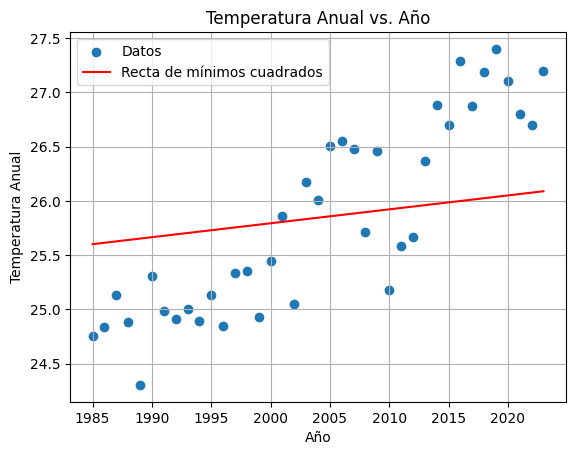

In [26]:
import numpy as np

# Extraer los valores de las columnas
años = df_final['Año']
temperaturas = df_final['Temperatura Anual']

# Crear la recta de mínimos cuadrados
x = np.arange(min(años), max(años)+1)  # Crear un rango de años para evaluar la ecuación
y = alpha + beta * x

# Crear el gráfico
plt.scatter(años, temperaturas, label='Datos')
plt.plot(x, y, color='red', label='Recta de mínimos cuadrados')
plt.xlabel('Año')
plt.ylabel('Temperatura Anual')
plt.title('Temperatura Anual vs. Año')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
df_final['X^3'] = df_final['Año']**3
df_final['X^4'] = df_final['Año']**4
df_final['X^2Y'] = df_final['X^2']*df_final['Temperatura Anual']

Para el caso cuadrático, se quiere obtener la ecuación de la forma $p(t) = \alpha + \beta t + \gamma t^2$. Esta se puede encontrar resolviendo las ecuaciones:

$\alpha n + \beta \sum{t} + \gamma \sum{t^2} = \sum{y}$

$\alpha \sum{t} + \beta \sum{t^2} + \gamma \sum{t^3} = \sum{xy}$

$\alpha \sum{t^2} + \beta \sum{t^3} + \gamma \sum{t^4} = \sum{x^2y}$

In [28]:
sumt = df_final['Año'].sum()
sumt2 = df_final['X^2'].sum()
sumt3 = df_final['X^3'].sum()
sumt4 = df_final['X^4'].sum()
sumy = df_final['Temperatura Anual'].sum()
sumxy = df_final['XY'].sum()
sumx2y = df_final['X^2Y'].sum()

# Crear las matrices A y b

A = np.array([[n, sumt, sumt2],
              [sumt, sumt2, sumt3],
              [sumt2, sumt3, sumt4]])

b = np.array([[sumy],
              [sumxy],
              [sumx2y]])

# Resolver usando la inversa de A
solution = np.linalg.inv(A) @ b

# Extraer los valores
alpha2 = solution[0, 0]
beta2 = solution[1, 0]
gamma = solution[2, 0]

print("alpha =", alpha2)
print("beta =", beta2)
print("gamma =", gamma)

alpha = -7.276449343862623e-05
beta = -0.04314986382286179
gamma = 2.7965586417433297e-05


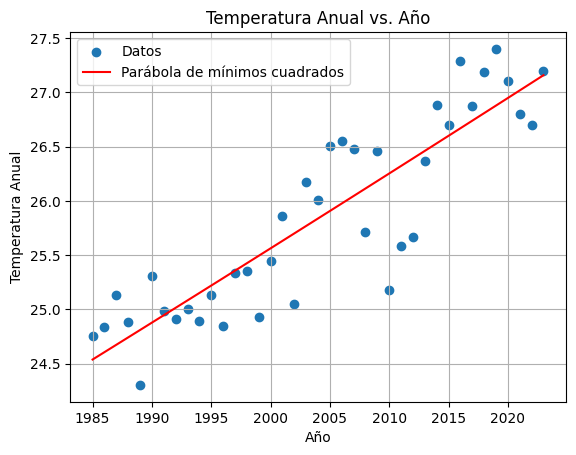

In [29]:
# Extraer los valores de las columnas
años = df_final['Año']
temperaturas = df_final['Temperatura Anual']

# Crear la recta de mínimos cuadrados
x = np.arange(min(años), max(años)+1)
y = alpha2 + beta2*x + gamma*(x**2)

# Crear el gráfico
plt.scatter(años, temperaturas, label='Datos')
plt.plot(x, y, color='red', label='Parábola de mínimos cuadrados')
plt.xlabel('Año')
plt.ylabel('Temperatura Anual')
plt.title('Temperatura Anual vs. Año')
plt.legend()
plt.grid(True)
plt.show()

## Bibliografía

- Tveito et al. (n.d.) Elements of scientific computing. Springer Heidelberg Dordrecht London New York. https://doi.org/10.1007/978-3-642-11299-7

- Google. (2024). Gemini (Oct 6 version) [Large language model]. https://gemini.google.com/app